### 4. 회귀분석
    - 가정검토(선형성, 등분산성-잔차도, 정규성-히스토그램/QQplot/Shapiro-wilk, 오차항의 독립성-더빈왓슨검정)
    - 단순선형회귀분석(회귀계수 검정, 결정계수 계산-SST/SSR/SSE, 회귀직선의 적합도 검토)
    - 다중선형회귀분석(회귀계수 검정, 회귀식, 결정계수 계산, 모형의 통계적 유의성, 교호작용, 다중공선성-PCA회귀, VIF 상위변수 제거)
    - 다항회귀분석
    - 스플라인 회귀
    - 로지스틱 회귀
    - 최적회귀방정식(전진선택법, 후진제거법, 단계적선택법 - AIC/BIC)
    - 정규화 선형회귀 Regularized Linear Regression (Ridge회귀, Lasso회귀, Elastic Net 회귀)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cars.csv')

## 사전작업
산점도에 추체선을 넣어 데이터에 선형적인 패턴이 있는 지 확인

극단값이 있을 경우 회귀분석의 결과가 왜곡될 수 있음. 상자 그림을 그려서 극단값이 있는 지 확인

선형 회귀분석은 독립변수와 종속변수가 정규분포를 따를 때 잘 작동함. 밀도 플롯(density plot)을 그려서 정규분포의 형태인지 확인

/Users/benny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speed', ylabel='dist'>

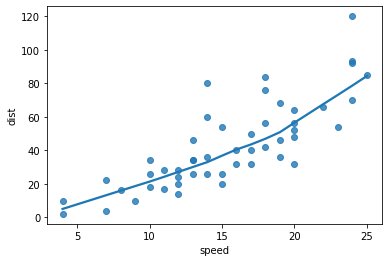

In [3]:
sns.regplot('speed', 'dist', lowess=True, data=df)

Text(0.5, 1.0, 'Distance')

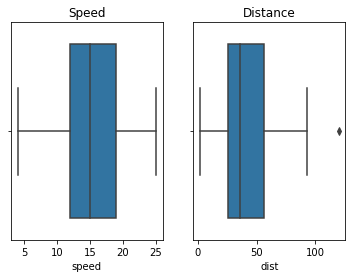

In [18]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 상자 그림을 첫번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot(x='speed', data=df, ax=ax1)
ax1.set_title('Speed')

# dist의 상자 그림을 두번째(ax2)로 그린다.
sns.boxplot(x='dist', data=df, ax=ax2)
ax2.set_title('Distance')

Text(0.5, 1.0, 'Distance')

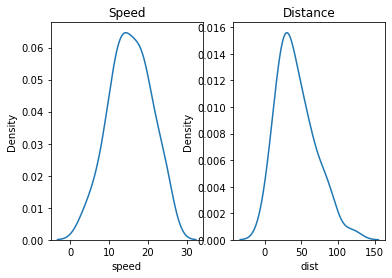

In [19]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 밀도 플롯
sns.kdeplot(df['speed'], ax=ax1)
ax1.set_title('Speed')

# dist의 밀도 플롯
sns.kdeplot(df['dist'], ax=ax2)
ax2.set_title('Distance')

In [25]:
import scipy.stats as stats
test_stat, p_val = stats.shapiro(df['speed'])
print(test_stat, p_val)
test_stat, p_val = stats.shapiro(df['dist'])
print(test_stat, p_val)

print('speed skew:', stats.skew(df['speed']))
print('dist skew:', stats.skew(df['dist']))

0.9776487350463867 0.4576255977153778
0.9514387249946594 0.03910042718052864
speed skew: -0.11395477012828319
dist skew: 0.7824835173114966


## 회귀분석 실시
ols 함수로 회귀분석을 실시. 종속변수 ~ 독립변수의 형태로 모형식 사용.

### 모형 적합도
모형이 데이터에 잘 맞는 정도를 보여주는 지표들이다.

- R-squared: 0.6511
    - R제곱
    - 모형 적합도(혹은 설명력)
    - dist의 분산을 speed가 약 65%를 설명한다
    - 각 사례마다 dist에 차이가 있다.


- Adj. R-squared: 0.6438
    - 독립변수가 여러 개인 다중회귀분석에서 사용
    - 독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정
    - 서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다


- F-statistic: 89.57, Prob(F-statistic): 1.49e-12
    - 회귀모형에 대한 (통계적) 유의미성 검증 결과, 유의미함 (p < 0.05)
    - 즉, 이 모형은 주어진 표본 뿐 아니라 모집단에서도 의미있는 모형이라 할 수 있음


- 로그 우도: 종속변수가 정규분포라 가정했을 때 그 우도
    - 로그우도도 R제곱과 마찬가지로 독립변수가 많아지면 증가한다
    - AIC, BIC: 로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다)
    
### 회귀계수
Coef는 데이터로부터 얻은 계수의 추정치를 말한다.

절편(Intercept)의 추정치는 -17.5791로, speed가 0일 때 dist의 값이다.

speed의 계수 추정치는 3.9324로 speed가 1 증가할 때마다 dist가 3.9324 증가한다는 것을 의미한다.

추정치의 표 중간의 P(>|t|)는 모집단에서 계수가 0일 때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률인 p값을 나타낸다. 이 확률이 매우 작다는 것은, 모집단에서 speed의 계수가 정확히 3.9324는 아니더라도 현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미한다. 보통 5%와 같은 유의수준을 정하여 p값이 그보다 작으면(p < 0.05), "통계적으로 유의미하다"라고 한다.

즉, speed가 증가할 때 기대되는 dist의 변화는 유의수준 5%에서 통계적으로 유의미하다.

### 결과 보고
먼저 모형적합도를 보고한다. F 분포의 파라미터 2개와 그 때의 F 값, p-value와 유의수준의 비교를 적시한다.
- dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다
    - (F(1,48) = 89.57, p < 0.05).

다음으로 독립변수에 대해 보고한다.
- speed의 회귀계수는 3.9324로, dist에 대하여 유의미한 예측변인인 것으로 나타났다
    - (t(48) = 9.464, p < 0.05).



In [27]:
from statsmodels.formula.api import ols
res = ols('dist ~ speed', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.49e-12
Time:                        17:11:45   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 절편의 고정
cars 데이터에서 dist는 거리를 뜻한다. 앞선 분석 결과에서 speed가 0일 때 dist가 -17.5791이 되는데 거리가 마이너스가 될 수는 없으므로 해석이 어색하다. 이럴 경우 모형에서 절편을 제거한다. 절편을 제거하면, 절편을 0으로 고정시킨 것과 같아진다.

In [29]:
res = ols('dist ~ 0 + speed', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   dist   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              423.5
Date:                Sun, 08 May 2022   Prob (F-statistic):                    9.23e-26
Time:                        17:17:10   Log-Likelihood:                         -209.87
No. Observations:                  50   AIC:                                      421.7
Df Residuals:                      49   BIC:                                      423.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          2.9091      0.141     20.578      0.000       2.625       3.193
==============================================================================
Omnibus:                       14.345   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.573
Skew:                           1.202   Prob(JB):                     0.000415
Kurtosis:                       4.302   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 다중공선성
공선성(collinearity): 하나의 독립변수가 다른 하나의 독립변수로 잘 예측되는 경우, 또는 서로 상관이 높은 경우

다중공선성(multicollinearity): 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우

(다중)공선성이 있으면:

- 계수 추정이 잘 되지 않거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라질 수 있다-- 계수가 통계적으로 유의미하지 않은 것처럼 나올 수 있다

### (다중)공선성의 진단
- 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단
- 엄밀한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단(5를 기준으로 하기도 함)

In [30]:
df = pd.read_csv('crab.csv')
df.head()

,crab,sat,y,weight,width,color,spine
0,1,8,1,3.05,28.3,2,3
1,2,0,0,1.55,22.5,3,3
2,3,9,1,2.30,26.0,1,1
3,4,0,0,2.10,24.8,3,3
4,5,4,1,2.60,26.0,3,3


In [31]:
model = ols('y ~ sat + weight + width', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     59.69
Date:                Sun, 08 May 2022   Prob (F-statistic):           2.30e-26
Time:                        17:19:10   Log-Likelihood:                -55.831
No. Observations:                 173   AIC:                             119.7
Df Residuals:                     169   BIC:                             132.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9366      0.500     -1.872      0.063      -1.924       0.051
sat            0.0971      0.009     11.018      0.000       0.080       0.115
weight        -0.0465      0.098     -0.475      0.635      -0.240       0.147
width          0.0535      0.026      2.023      0.045       0.001       0.106
==============================================================================
Omnibus:                       29.724   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.545
Skew:                           0.086   Prob(JB):                       0.0230
Kurtosis:                       1.992   Cond. No.                         526.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결과를 보면 유의수준 5%에서 sat와 width는 통계적으로 유의미하고, weight는 유의미하지 않게 나왔다.

### VIF 계산
statsmodels에서 variance_inflation_factor 함수를 불러들인다.

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# print(model.exog_names)

# print(variance_inflation_factor(model.exog, 1))
# print(variance_inflation_factor(model.exog, 2))
# print(variance_inflation_factor(model.exog, 3))

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,sat,1.158837
1,weight,4.801679
2,width,4.688660


### 다중공선성 대처
- 계수가 통계적으로 유의미하지 않다면 대처
    - 계수가 통계적으로 유의미하다면 VIF가 크더라도 특별히 대처할 필요없음
- 변수들을 더하거나 빼서 새로운 변수를 만든다
    - (개념적으로나 이론적으로) 두 예측변수를 더하거나 빼더라도 문제가 없는 경우
        - 예) 남편의 수입과 아내의 수입이 서로 상관이 높다면, 두 개를 더해 가족 수입이라는 하나의 변수로 투입한다
    - 더하거나 빼기 어려운 경우는 변수를 모형에서 제거한다
        - 단, 변수를 제거하는 것은 자료의 다양성을 해치고, 분석하려던 가설이나 이론에 영향을 미칠 수 있기 때문에 가급적 자제


## 잔차분석
- 잔차분석은 회귀모형에 대한 가정(정규성, 등분산성, 독립성)을 충족하는 지에 대한 검정, 이상치가 개입하는 지에 대한 검정을 하는 절차

### 모형의 선형성
- 예측값(fitted)과 잔차(residual)을 비교
- 모든 예측값에서 가운데 점선에 맞추어 잔차가 비슷하게 있어야 한다.
- 빨간 실선은 잔차의 추세를 나타낸다.
- 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것으로 선형성이 없다는 것이다.

/Users/benny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


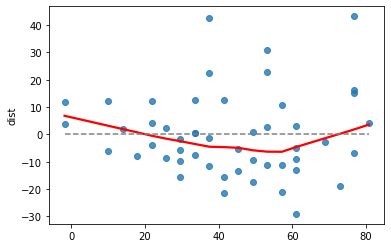

In [38]:
df = pd.read_csv('./cars.csv')
res = ols('dist ~ speed', data=df).fit()
fitted = res.predict()
residual = df['dist'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

### 잔차의 정규성
- 잔차가 정규분포를 따른다는 가정을 한다.
- Q-Q Plot로 확인할 수 있다.
- 잔차가 정규분포를 띄면 Q-Q Plot에서 점들이 점선을 따라 배치되어 있어야 한다.

/Users/benny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


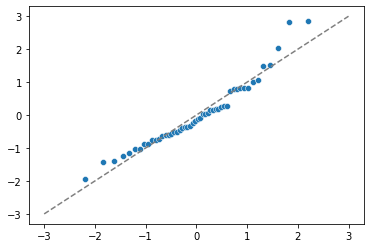

In [39]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

- 잔차의 정규성은 샤피로 검정으로 확인할 수 있다.
- 아래 분석에서 두 번째 값이 p값이다. p값이 0.005이므로 유의수준 5%에서 잔차의 정규성이 위반됐다고 판단한다.

In [41]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9450905919075012, pvalue=0.02152460627257824)

### 잔차의 등분산성
- 회귀모형을 통해 예측된 값이 어떻든지, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
- 아래 그래프는 예측값(X축)에 따라 잔차가 어떻게 달라지는 지 보여줌
- 빨간색 실선이 수평선에 가까울수록 등분산성이 있다는 것이다.

/Users/benny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='dist'>

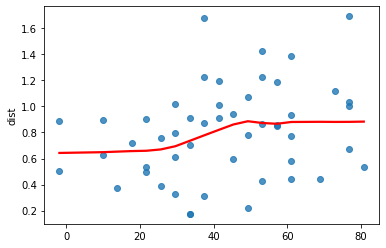

In [42]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

### 잔차의 독립성
- Result.summary의 Durbin-Watson(더빈왓슨, DW검정)으로 확인한다.
- DW검정은 잔차의 독립성을 확인할 수 있는 수치이다. 0이면 잔차들이 양의 자기상관을 갖고, 2이면 자기사오간이 없는 독립성을 갖고, 4이면 잔차들이 음의 자기상관을 갖는다고 해석한다.
- 보통 1.5 ~ 2.5 사이이면 독립으로 판단하고 회귀모형이 적합하다는 것을 의미한다. DW검정값이 0 또는 4에 가깝다는 것은 잔차들이 자기상관을 가지고 있다는 의미ㅣ이고, 이는 t값, F값, R제곱을 실제보다 증가시켜 실제로 유의미하지 않은 결과를 유의미한 결과로 왜곡하게 된다.
- 아래 회귀분석에서 더빈왓슨검정의 값이 1.848이므로 독립성이 있다고 판단할 수 있다.

In [43]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.49e-12
Time:                        17:50:19   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 극단값
- Cook's distance는 극단값을 나타내는 지표이다.
- 48, 22, 38번 자료가 특히 예측에서 많이 벗어남을 알 수 있음

In [46]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(res).cooks_distance
cd.sort_values(ascending=False).head()

48    0.340396
22    0.085552
38    0.068053
44    0.053176
34    0.052576
dtype: float64

### 잔차의 독립성
- 회귀분석에서 잔차는 정규성, 등분상성 그리고 독립성을 가지는 것으로 가정
- 자료 수집 과정에서 무작위 표집(random sampling)을 하였다면, 잔차의 독립성은 만족하는 것으로 봄
- 시계열 자료나 종단연구 자료처럼, 연구 설계 자체가 독립성을 담보할 수 없는 경우에는 더빈-왓슨 검정(Durbin-Watson test) 등을 실시

### 잔차 분석 결과를 바탕으로 대응
- 잔차 분석 결과에 따라 다양한 방식의 대응이 가능
    - 극단값을 제거
    - 독립변수를 추가
    - 종속변수를 수학적으로 변환


위의 예에서는 48번 자료가 극단값으로 보이고 이 때문에 잔차의 정규성이 위배되는 것으로 추측된다. 따라서 48번 자료를 제거하고 다시 분석을 시도해볼 수 있다.

### 변수 선택

In [47]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_csv('./crab.csv')

In [48]:
X = df.drop('y', axis=1)
y = df['y']

In [49]:
X = sm.add_constant(X, has_constant = "add")

/Users/benny/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
feature_columns = X.columns

In [51]:
# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.

def processSubset(X, y, feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}
    
print(processSubset(X = X, y = y, feature_set = feature_columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b55736250>, 'AIC': 118.21648726153933}


In [52]:
import time
import itertools

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수

def getBest(X, y, k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    for combo in itertools.combinations(X.columns.difference(['const']), k) :
        # 각 변수 조합을 고려한 경우의수
        
        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성
        
        results.append(processSubset(X, y, feature_set = combo)) # 모델링된것을 저장
        
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함

    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc - tic),"seconds.")
    
    return best_model
    
print(getBest(X, y, k=2))

Processed 15 models on 2 predictors in 0.037238121032714844 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                             117.893504
Name: 11, dtype: object


In [53]:
print(X.columns, X.columns.shape)

Index(['const', 'crab', 'sat', 'weight', 'width', 'color', 'spine'], dtype='object') (7,)


In [56]:
# 변수 선택에 따른 학습시간과 저장

models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,7):
    models.loc[i] = getBest(X=X, y=y, k=i)
toc = time.time()
print("Total elapsed time:",(toc-tic),"seconds.")

Processed 6 models on 1 predictors in 0.016340017318725586 seconds.
Processed 15 models on 2 predictors in 0.026836156845092773 seconds.
Processed 20 models on 3 predictors in 0.03943920135498047 seconds.
Processed 15 models on 4 predictors in 0.028110027313232422 seconds.
Processed 6 models on 5 predictors in 0.014519929885864258 seconds.
Processed 1 models on 6 predictors in 0.002763032913208008 seconds.
Total elapsed time: 0.13625073432922363 seconds.


In [57]:
# 선택된 변수의 개수(1,2,3)별 가장낮은 AIC를 보유한 모델들이 들어있는 DF
models

,AIC,model
1,126.538582,<statsmodels.regression.linear_model.Regressio...
2,117.893504,<statsmodels.regression.linear_model.Regressio...
3,116.138441,<statsmodels.regression.linear_model.Regressio...
4,114.808502,<statsmodels.regression.linear_model.Regressio...
5,116.303257,<statsmodels.regression.linear_model.Regressio...
6,118.216487,<statsmodels.regression.linear_model.Regressio...


In [58]:
# 가장 AIC가 낮은 3번째 모델의 OLS결과를 출력

models.loc[4,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     48.00
Date:                Sun, 08 May 2022   Prob (F-statistic):           7.21e-27
Time:                        17:52:58   Log-Likelihood:                -52.404
No. Observations:                 173   AIC:                             114.8
Df Residuals:                     168   BIC:                             130.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
color         -0.0868      0.035     -2.458      0.015      -0.157      -0.017
sat            0.0948      0.009     11.004      0.000       0.078       0.112
spine          0.0600      0.033      1.807      0.073      -0.006       0.125
width          0.0376      0.013      2.870      0.005       0.012       0.063
const         -0.5603      0.370     -1.515      0.132      -1.290       0.170
==============================================================================
Omnibus:                       17.660   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.834
Skew:                           0.056   Prob(JB):                       0.0541
Kurtosis:                       2.107   Cond. No.                         393.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# train & 회귀모델 적합

full_model = sm.OLS(y, X)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     31.82
Date:                Sun, 08 May 2022   Prob (F-statistic):           2.65e-25
Time:                        17:53:07   Log-Likelihood:                -52.108
No. Observations:                 173   AIC:                             118.2
Df Residuals:                     166   BIC:                             140.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6577      0.517     -1.272      0.205      -1.679       0.363
crab           0.0004      0.001      0.691      0.490      -0.001       0.001
sat            0.0955      0.009     10.897      0.000       0.078       0.113
weight        -0.0281      0.097     -0.289      0.773      -0.220       0.164
width          0.0430      0.026      1.626      0.106      -0.009       0.095
color         -0.0871      0.036     -2.454      0.015      -0.157      -0.017
spine          0.0561      0.034      1.659      0.099      -0.011       0.123
==============================================================================
Omnibus:                       18.236   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.936
Skew:                           0.059   Prob(JB):                       0.0514
Kurtosis:                       2.100   Cond. No.                     2.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# 모든 변수를 모델링한 것과 비교

print("full model Rsquared:","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC:","{:.5f}".format(fitted_full_model.aic))
print("full model MSE:","{:.5f}".format(fitted_full_model.mse_total))

print("selected model Rsquared:","{:.5f}".format(models.loc[4,"model"].rsquared))
print("selected model AIC:","{:.5f}".format(models.loc[4,"model"].aic))
print("selected model MSE:","{:.5f}".format(models.loc[4,"model"].mse_total))

full model Rsquared: 0.53492
full model AIC: 118.21649
full model MSE: 0.23128
selected model Rsquared: 0.53333
selected model AIC: 114.80850
selected model MSE: 0.23128


In [62]:
### 전진선택법(step=1)
def forward(X,y,predictors):

    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
        results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:", best_model["model"].model.exog_names, "AIC: ",best_model[0])
    return best_model
    
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1 :
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [63]:
Forward_best_model = forward_model(X, y)
print(Forward_best_model.aic)
Forward_best_model.summary()

Processed  6 models on 1 predictors in 0.014698982238769531
Selected predictors: ['sat', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b51696c70>
Processed  5 models on 2 predictors in 0.010293960571289062
Selected predictors: ['sat', 'width', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b516a3be0>
Processed  4 models on 3 predictors in 0.011291742324829102
Selected predictors: ['sat', 'width', 'color', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b51696c40>
Processed  3 models on 4 predictors in 0.006404876708984375
Selected predictors: ['sat', 'width', 'color', 'spine', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b516a3f70>
Processed  2 models on 5 predictors in 0.005532026290893555
Selected predictors: ['sat', 'width', 'color', 'spine', 'crab', 'const'] AIC:  <statsmodels.regression.linear_model.Re

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     48.00
Date:                Sun, 08 May 2022   Prob (F-statistic):           7.21e-27
Time:                        17:53:28   Log-Likelihood:                -52.404
No. Observations:                 173   AIC:                             114.8
Df Residuals:                     168   BIC:                             130.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sat            0.0948      0.009     11.004      0.000       0.078       0.112
width          0.0376      0.013      2.870      0.005       0.012       0.063
color         -0.0868      0.035     -2.458      0.015      -0.157      -0.017
spine          0.0600      0.033      1.807      0.073      -0.006       0.125
const         -0.5603      0.370     -1.515      0.132      -1.290       0.170
==============================================================================
Omnibus:                       17.660   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.834
Skew:                           0.056   Prob(JB):                       0.0541
Kurtosis:                       2.107   Cond. No.                         393.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
### 후진소거법(step=1)

def backward(X, y, predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed ",models.shape[0], "models on", len(predictors) - 1, "predictors in",(toc-tic))
    print("Selected predictors:",best_model['model'].model.exog_names,' AIC:', best_model[0])
    return best_model
    
def backward_model(X, y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X, y, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before :
            break
        Bmodels.loc[len(predictors) -1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors if k != 'const']
    
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Bmodels["model"].dropna().iloc[0])


In [65]:
Backward_best_model = backward_model(X, y)
print(Backward_best_model.aic)
Backward_best_model.summary()

Processed  6 models on 5 predictors in 0.020044803619384766
Selected predictors: ['color', 'crab', 'sat', 'spine', 'width', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b516b0eb0>
Processed  5 models on 4 predictors in 0.012372970581054688
Selected predictors: ['color', 'sat', 'spine', 'width', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b516a7280>
Processed  4 models on 3 predictors in 0.006307125091552734
Selected predictors: ['color', 'sat', 'width', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b516a7250>
Total elapsed time: 0.05256009101867676 seconds.
116.30325747383466


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     38.38
Date:                Sun, 08 May 2022   Prob (F-statistic):           4.21e-26
Time:                        17:53:36   Log-Likelihood:                -52.152
No. Observations:                 173   AIC:                             116.3
Df Residuals:                     167   BIC:                             135.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
color         -0.0874      0.035     -2.469      0.015      -0.157      -0.018
crab           0.0004      0.001      0.699      0.486      -0.001       0.001
sat            0.0952      0.009     11.010      0.000       0.078       0.112
spine          0.0572      0.033      1.710      0.089      -0.009       0.123
width          0.0364      0.013      2.754      0.007       0.010       0.062
const         -0.5538      0.371     -1.495      0.137      -1.285       0.178
==============================================================================
Omnibus:                       17.937   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.910
Skew:                           0.067   Prob(JB):                       0.0521
Kurtosis:                       2.104   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])

In [67]:
Stepwise_best_model = Stepwise_model(X, y)
print(Stepwise_best_model.aic)
Stepwise_best_model.summary()

Processed  6 models on 1 predictors in 0.01668405532836914
Selected predictors: ['sat', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b516a3cd0>
forward
Processed  1 models on 0 predictors in 0.00179290771484375
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b70da3790>
Processed  5 models on 2 predictors in 0.011258840560913086
Selected predictors: ['sat', 'width', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b70dae760>
forward
Processed  2 models on 1 predictors in 0.0035538673400878906
Selected predictors: ['sat', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b55754df0>
Processed  4 models on 3 predictors in 0.007338047027587891
Selected predictors: ['sat', 'width', 'color', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8b70da3d60>
forwa

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     48.00
Date:                Sun, 08 May 2022   Prob (F-statistic):           7.21e-27
Time:                        17:53:41   Log-Likelihood:                -52.404
No. Observations:                 173   AIC:                             114.8
Df Residuals:                     168   BIC:                             130.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sat            0.0948      0.009     11.004      0.000       0.078       0.112
width          0.0376      0.013      2.870      0.005       0.012       0.063
color         -0.0868      0.035     -2.458      0.015      -0.157      -0.017
spine          0.0600      0.033      1.807      0.073      -0.006       0.125
const         -0.5603      0.370     -1.515      0.132      -1.290       0.170
==============================================================================
Omnibus:                       17.660   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.834
Skew:                           0.056   Prob(JB):                       0.0541
Kurtosis:                       2.107   Cond. No.                         393.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""